In [1]:
import pandas as pd

load csv into pandas dataframe

In [10]:
df = pd.read_csv('../datasets/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


convert dataframe into array

In [46]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [47]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [48]:
from sklearn import preprocessing

In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [50]:
from sklearn.model_selection import train_test_split

Split data into 70% training, 15% validation, 15% test

In [51]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape)

(1022, 10) (219, 10)


In [71]:
from keras.models import Sequential
from keras.layers import Dense

### Model 1:

In [104]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


model.compile(optimizer='sgd',      
              loss='binary_crossentropy',              
              metrics=['accuracy'])


hist = model.fit(X_train, Y_train,          
                 batch_size=32, epochs=100,          
                 validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 868us/step - loss: 0.6797 - acc: 0.5176 - val_loss: 0.6774 - val_acc: 0.5023
Epoch 2/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6731 - acc: 0.5597 - val_loss: 0.6716 - val_acc: 0.5936
Epoch 3/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6677 - acc: 0.6076 - val_loss: 0.6661 - val_acc: 0.6484
Epoch 4/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.6626 - acc: 0.6585 - val_loss: 0.6609 - val_acc: 0.6530
Epoch 5/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.6578 - acc: 0.6703 - val_loss: 0.6558 - val_acc: 0.6804
Epoch 6/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6532 - acc: 0.6957 - val_loss: 0.6508 - val_acc: 0.7215
Epoch 7/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.6488 - acc: 0.7182 - val_loss: 0.6461 - val_acc: 0.7397


In [44]:
import matplotlib.pyplot as plt

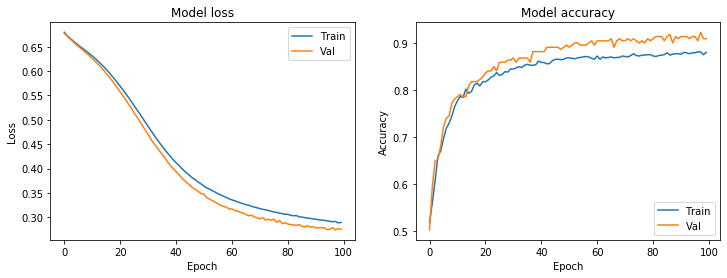

In [105]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

plt.show()

### Model 2:

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])


model_2.compile(optimizer='adam',      
              loss='binary_crossentropy',              
              metrics=['accuracy'])


hist = model_2.fit(X_train, Y_train,          
                 batch_size=32, epochs=100,          
                 validation_data=(X_val, Y_val))

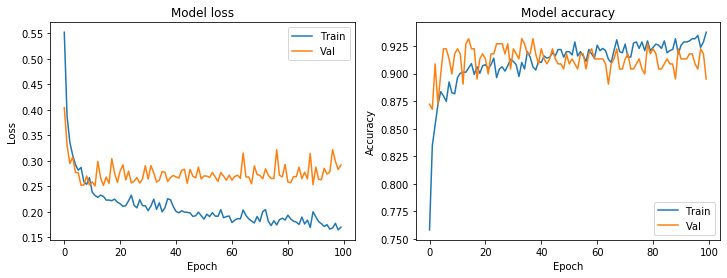

In [107]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

plt.show()

### Model 3:

In [102]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)), Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',      
              loss='binary_crossentropy',              
              metrics=['accuracy'])


hist = model_3.fit(X_train, Y_train,          
                 batch_size=32, epochs=100,          
                 validation_data=(X_val, Y_val))


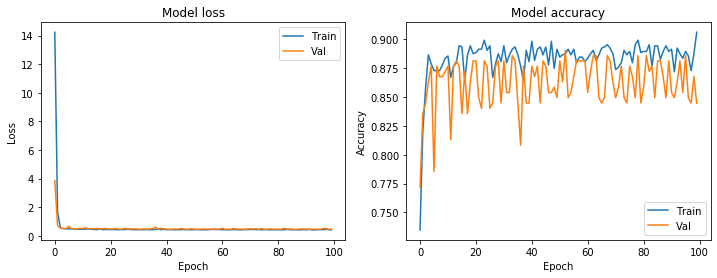

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

plt.show()